The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

<<______HEAD______>>
   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date        

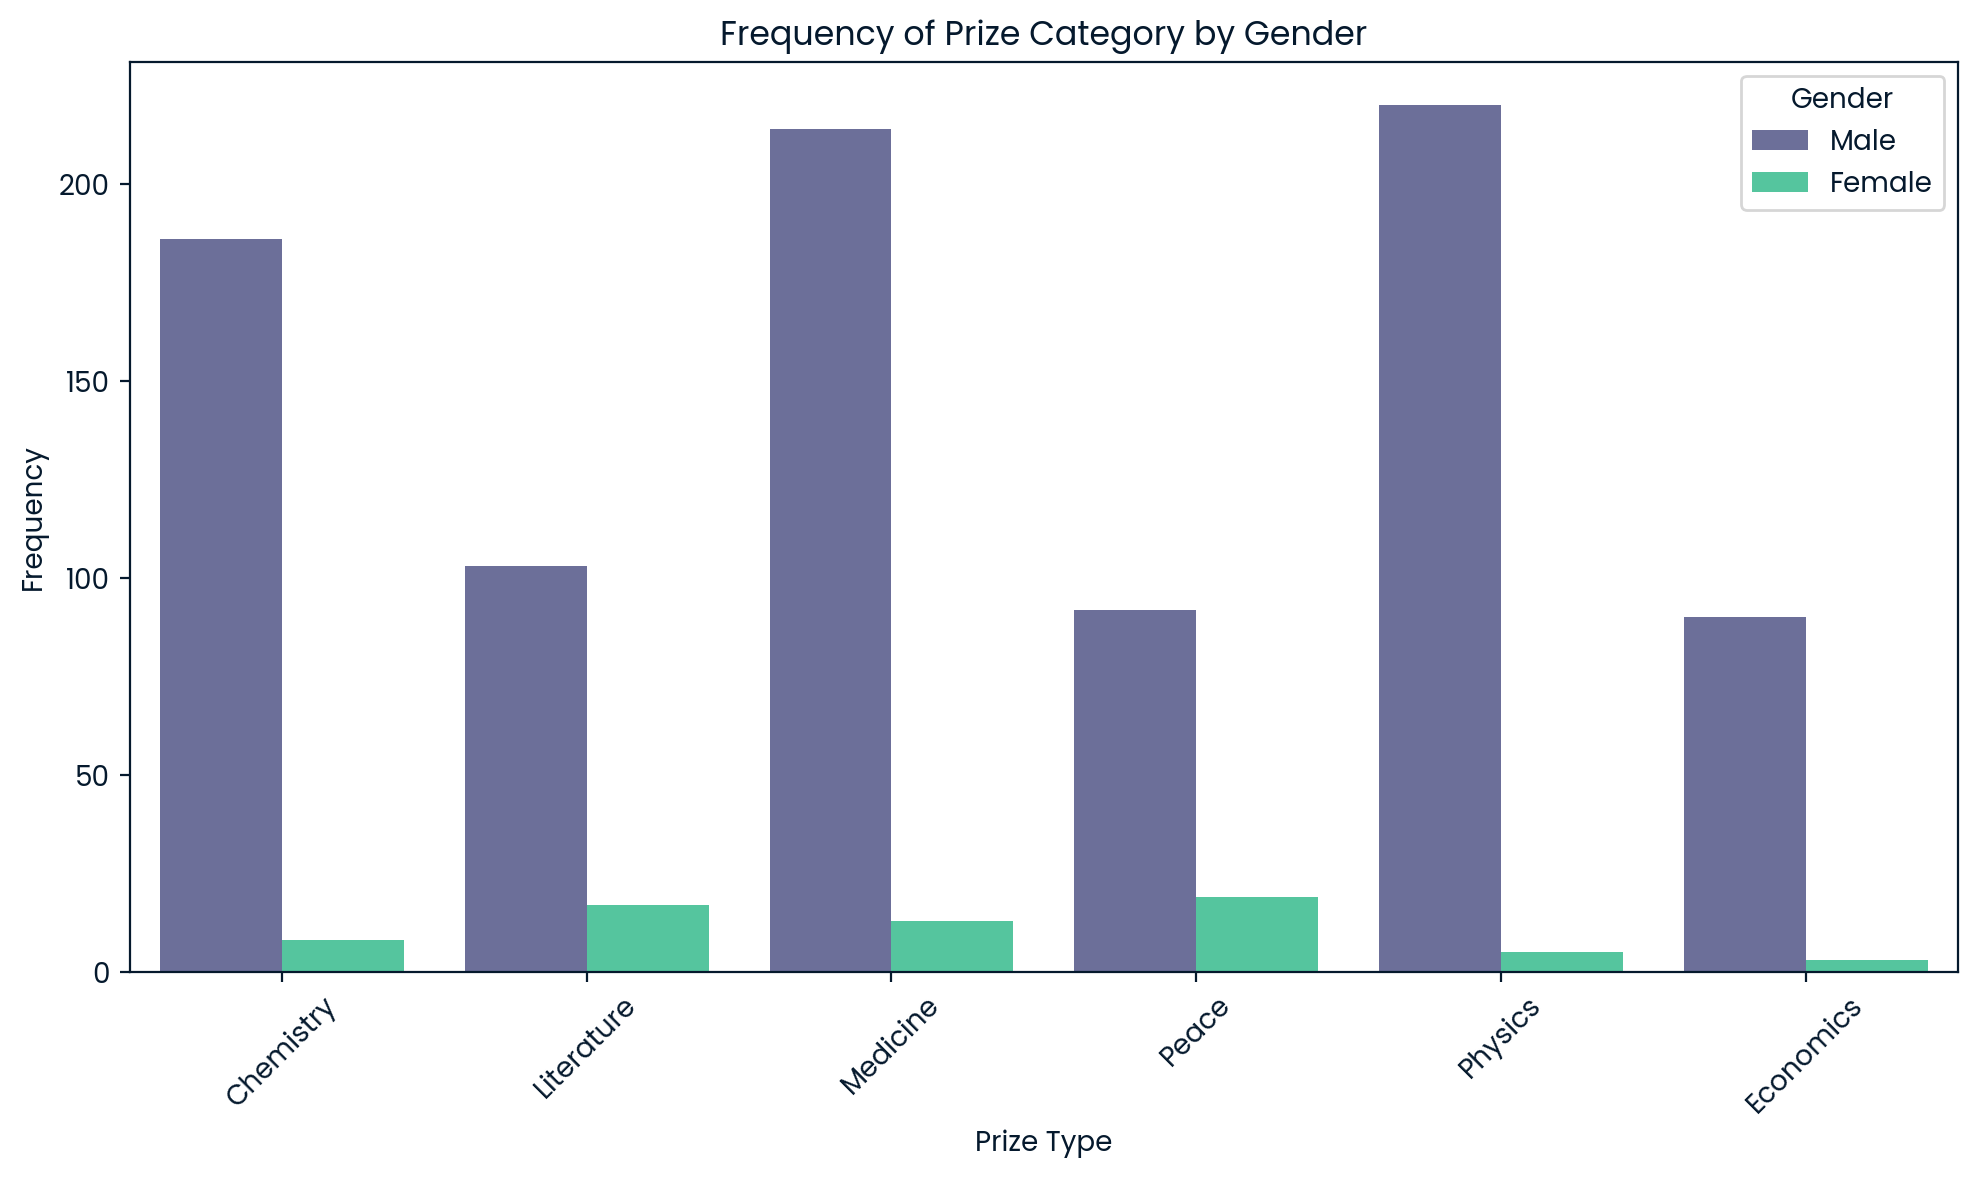

United States of America    291
Name: birth_country, dtype: int64
United States of America    385
Name: organization_country, dtype: int64
True
   decade   category   sex  count
0    2000    Physics  Male     28
1    2010  Chemistry  Male     26
2    1970    Physics  Male     25
3    1960   Medicine  Male     25
4    2010    Physics  Male     25
    decade category     sex  count
49    2000    Peace    Male      8
86    2000    Peace  Female      2
sex  decade category  female_count  male_count
58     2000    Peace             2           8
sex  decade    category  female_count  male_count  total_count  female_prop
70     2020       Peace             2           2            4          0.5
68     2020  Literature             2           2            4          0.5
64     2010       Peace             5           5           10          0.5
50     1990  Literature             3           7           10          0.3
56     2000  Literature             3           7           10          0

In [1]:

# Start coding here!

# Code for Datacamp Project: "Visualizing the History of Nobel Prize Winners"

# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fun: explore_df
def explore_df(df, method):
    """
    Function to run describe, head, or info on df.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame to explore.
    method : {'desc', 'head', 'info', 'all'}
        Specify the method to use.
        - 'desc': Display summary statistics using describe().
        - 'head': Display the first few rows using head().
        - 'info': Display concise information about the DataFrame using info().
        - 'na': Display counts of NAs per column and percentage of NAs per column.
        - 'all': Display all information from above options.

    Returns
    -------
    None
    """
    if method.lower() == "desc":
        print(df.describe())
    elif method.lower() == "head":
        pd.set_option('display.max_columns', None)
        print(df.head())
        pd.reset_option('display.max_columns')
    elif method.lower() == "info":
        print(df.info())
    elif method.lower() == "na":
        print(f"\n\n<<______NA_COUNT______>>")
        print(df.isna().sum())
        print(f"\n\n<<______NA_PERCENT______>>")
        print((df.isna().sum() / df.shape[0])*100)
    elif method.lower() == "all":
        print("<<______HEAD______>>")
        pd.set_option('display.max_columns', None)
        print(df.head())
        pd.reset_option('display.max_columns')
        print(f"\n\n<<______DESCRIBE______>>")
        print(df.describe())
        print(f"\n\n<<______INFO______>>")
        print(df.info())
        print(f"\n\n<<______NA_COUNT______>>")
        print(df.isna().sum())
        print(f"\n\n<<______NA_PERCENT______>>")
        print((df.isna().sum() / df.shape[0])*100)
    else:
        print("Methods: 'desc', 'head', 'info' or 'all'")

        
# Load data: nobel.csv
nobel = pd.read_csv('data/nobel.csv')

# Get to know the data
explore_df(nobel, "all")



# Question 1. What is the most commonly awarded gender and birth country? Storing the string answers as top_gender and top_country.

# top_gender - SHORT ANSWER:
print(nobel['sex'].value_counts())

# top_gender - VISUAL ANSWER:
# Create bar plot: to answer top_gender
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(x='category', hue='sex', data=nobel)

# Add custom titles and labels
plt.title('Frequency of Prize Category by Gender')
plt.xlabel('Prize Type')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Gender')  # Add legend with custom title
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

# top_country - according to birth_country
print(nobel['birth_country'].value_counts().head(1))

# top_country - according to organization_country
print(nobel['organization_country'].value_counts().head(1))

# Question 1. Answers
top_gender = "Male"
top_country = "United States of America"



# Question 2. What decade had the highest proportion of US-born winners? Store this as an integer called max_decade_usa

# create new var: "decade"
nobel["decade"] = (nobel["year"] // 10) * 10
# this will round years to nearest decade
# e.g. 1915 // 10 = 191 * 10 = 1910

# sanity check 
print(nobel["year"][0] // 10 * 10 == nobel["decade"][0])

# max_decade_usa
usa_filter = nobel["birth_country"] == "United States of America"
nobel[usa_filter]["decade"].value_counts()

# Question 2. Answer
max_decade_usa = 2000



# Question 3. What decade and category pair had the highest proportion of female laureates? Store this as a dictionary called max_female_dict where the decade is the key and the category is the value.

# create new df for q3: q3_df
q3_df = (
    nobel[["decade", "category", "sex"]]
    .value_counts()
    .reset_index()
    .rename(columns={0: 'count'})
)

# sanity check
print(q3_df.head())

# pre-pivot sanity check
print(q3_df[(q3_df["decade"] == 2000)&(q3_df["category"] == "Peace")])

# Pivot the DataFrame to get male and female counts in separate columns
q3_df = q3_df.pivot_table(
    index=['decade', 'category'], # grouping by these
    columns='sex', # unique values become grouping keys for values
    values='count', # values of above keys
    fill_value=0 # what to fill na's with
).reset_index() # make index normal again

# Rename the columns for clarity
q3_df.rename(columns={'Male': 'male_count', 'Female': 'female_count'}, inplace=True)

# post-pivot sanity check
print(q3_df[(q3_df["decade"] == 2000)&(q3_df["category"] == "Peace")])

# create new column: total_count
q3_df["total_count"] = q3_df["male_count"] + q3_df["female_count"]

# create new column: female_prop
q3_df["female_prop"] = q3_df["female_count"] / q3_df["total_count"]

# create new df sorted by female_prop: q3_df_sorted
q3_df_sorted = q3_df.sort_values("female_prop", ascending=False)

# sanity check
print(q3_df_sorted.head())

# create required dictionary: max_female_dict
max_filter = q3_df_sorted["female_prop"] == q3_df_sorted["female_prop"].max()
max_decade = q3_df_sorted[max_filter]["decade"].tolist()
max_cat = q3_df_sorted[max_filter]["category"].tolist()
max_female_dict = dict(
    zip(max_decade,max_cat)
)

# sanity check
print(max_female_dict)



# Question 4. Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as first_woman_name and first_woman_category.
(first_woman_name, first_woman_category) = (
    nobel[(nobel["sex"] == "Female")] # only Females
    .sort_values("year", ascending=True) # most recent first
    [["full_name", "category"]] # get only cols of interest
    .values[0] # get values from first row only
)

# sanity check
print(first_woman_name, "in" ,first_woman_category)



# Question 5. Which individuals or organizations have won multiple Nobel Prizes throughout the years? Store the full names in a list named repeat_list.

# create new df for question: q5_df
q5_df = pd.DataFrame(
    (
        nobel["full_name"]
        .value_counts() # count occurences of full_name
        .reset_index() # get name out of index
        .rename(
            columns={"index": "full_name", "full_name": "count"}
        ) # give cols understandable names
    )
)

# sanity check
print(q5_df.head())

# create list for answer: repeat_list
repeat_list = q5_df[q5_df["count"] > 1]["full_name"].tolist()

# sanity check
print(repeat_list)